<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/CNN_members_of_calss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

members_folder='/content/drive/MyDrive/MEMBERS'
photos,labels=list(),list()

for file in listdir(members_folder):
   if file.endswith('.jpg') or file.endswith('.bmp') or file.endswith('.png'):
     output=0
     if file.startswith('LAM'):
       output=1
     elif file.startswith('NguyenDoanQuangNhat'):
       output=2
     elif file.startswith('Phong'):
       output=3
     elif file.startswith('QuangNhat'):
       output=4
     elif file.startswith('THAOHUNG'):
       output=5
     elif file.startswith('THOA'):
       output=6
     elif file.startswith('ToanQuan'):
       output=7
     photo=load_img(members_folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('members_photos.npy',photos)
save('members_labels.npy',labels)

(349, 200, 200, 3) (349,)


In [2]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [3]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (279, 200, 200, 3)
X_test: (70, 200, 200, 3)
y_train: (279, 7)
y_test: (70, 7)


In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
   
classes=7

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [5]:
batch_size=32
epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
9/9 [==============================] - 32s 3s/step - loss: 3.0699 - accuracy: 0.3513
Epoch 2/20
9/9 [==============================] - 32s 4s/step - loss: 0.7057 - accuracy: 0.8530
Epoch 3/20
9/9 [==============================] - 31s 3s/step - loss: 0.1161 - accuracy: 0.9749
Epoch 4/20
9/9 [==============================] - 31s 3s/step - loss: 0.0265 - accuracy: 0.9928
Epoch 5/20
9/9 [==============================] - 31s 3s/step - loss: 0.0063 - accuracy: 0.9964
Epoch 6/20
9/9 [==============================] - 31s 3s/step - loss: 9.3069e-05 - accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 31s 3s/step - loss: 0.0066 - accuracy: 0.9964
Epoch 8/20
9/9 [==============================] - 36s 4s/step - loss: 0.0446 - accuracy: 0.9928
Epoch 9/20
9/9 [==============================] - 30s 3s/step - loss: 0.0123 - accuracy: 1.0000
Epoch 10/20
9/9 [==============================] - 30s 3s/step - loss: 0.0034 - accuracy: 1.0000
Epoch 11/20
9/9 [==================

In [6]:
model.save("/content/drive/MyDrive/AI/cnn_members.h5")

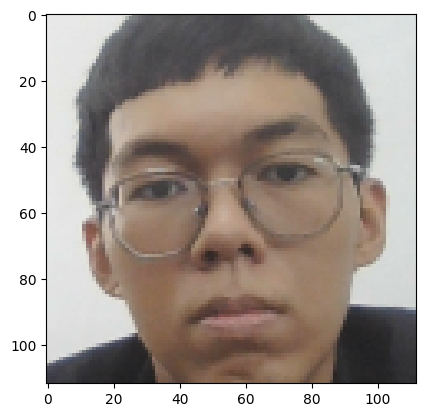

In [7]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/cnn_members.h5")
img=load_img('/content/drive/MyDrive/MEMBERS/NguyenDoanQuangNhat_0002.bmp')
plt.imshow(img)
plt.show()

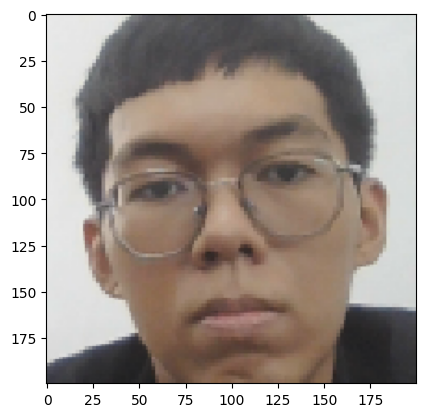

In [8]:
img=load_img('/content/drive/MyDrive/MEMBERS/NguyenDoanQuangNhat_0002.bmp',target_size=(200,200))
plt.imshow(img)

In [9]:
class_name = ['LÂM','NHẬT NGUYỄN','PHONG','NHẬT LÊ','HƯNG','THOA','QUÂN']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("ĐÂY LÀ:", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 152ms/step
ĐÂY LÀ: NHẬT NGUYỄN [5.1380789e-09 9.9999559e-01 3.7960319e-09 1.6584761e-07 4.3443329e-06
 8.8264890e-10 4.6511488e-08]
0.9999956


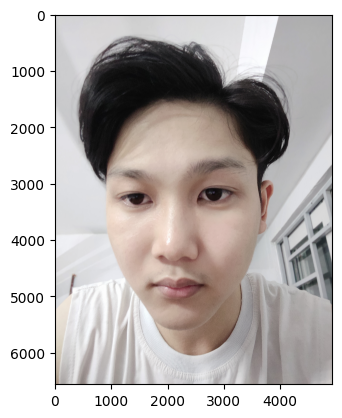

1/1 [==============================] - 0s 118ms/step
ĐÂY LÀ LÂM [9.9997234e-01 8.0676164e-06 9.5895562e-11 1.5387163e-09 1.9092924e-05
 3.2253430e-10 4.5459456e-07]
0.99997234


In [10]:
img1=load_img('/content/drive/MyDrive/MEMBERS/LAM400.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/MEMBERS/LAM400.jpg',target_size=(200,200))

img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("ĐÂY LÀ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

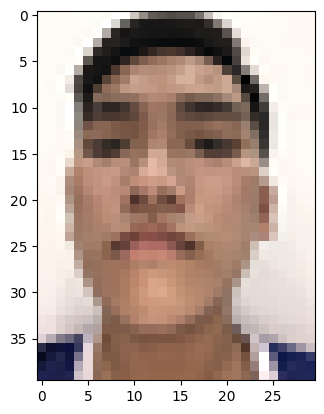

1/1 [==============================] - 0s 59ms/step
ĐÂY LÀ HƯNG [3.1468693e-15 5.2880711e-10 2.9432976e-19 1.0409696e-13 1.0000000e+00
 1.1939374e-17 5.6190247e-15]
1.0


In [11]:
img2=load_img('/content/drive/MyDrive/MEMBERS/THAOHUNG_59.png')
plt.imshow(img2)
plt.show()

img2=load_img('/content/drive/MyDrive/MEMBERS/THAOHUNG_59.png',target_size=(200,200))

img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("ĐÂY LÀ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))